TRABAJO FIN DE MASTER

Máster en Big Data y Data Science

Título: Descubriendo similitud entre documentos a partir de entidades nombradas

Tutor: Pablo A. Haya Coll

Estudiante: Emilio J. Macias Macias

# Fase 1: PLN

Se implementará el bloque de PLN utilizando el NER con modelos preentrenados de Spacy, y se realizará una evaluación de los mismos. La evaluación precisa separar y anotar a mano las entidades nombradas en un conjunto de noticias (mínimo 100). Este conjunto lo llamaremos Gold Standard. 

## Gold Standard
Se ha partido de un conjunto de 341695 noticias sin anotar, de las cuales se han seleccionado 100 noticias aleatoriamente para formar el conjunto del Gold Standard.

Se ha utilizado la herramienta web **Brat Rapid Annotation Tool** (v1.3) para anotar manualmente las noticias del Gold Standard. Esta herramienta genera un fichero .ann por cada noticia anotada. Tanto las noticias en crudo (.txt) como las anotadas (.ann) se encuentran en el directorio /gold-standard de este prototipo.

A continuación se muestra una imagen de cómo se han anotado las noticias:

![title](../img/brat.png)

## Librerías
Para este prototipo se ha usado la versión de Python 3.7. A continuación se muestran las librerías que se han utilizado:

* **BratReader** (v1.0.1): Permite crear la estructura de objetos a partir de un repositorio de ficheros anotados en Brat. Disponible en GitHub con licencia GPL.
* **Spacy** (v2.0.12): Permite realizar procesamiento de lenguaje natural en Python, incluyendo reconocimiento de entidades nombradas.
* **Scikit-Learn** (0.20.2): Librería de machine learning que se ha utilizado para construir la matriz de confusión de las entidades nombradas detectadas por Spacy. 
* **Matplotlib** (3.0.2): Se ha utilizado para representar gráficamente la matriz de confusión.

## Evaluación

In [5]:
# Cargar "Gold Standard" anotado usando la librería bratreader.
import sys,os
from pathlib import Path

# Directorio raiz del TFM
tfm_dir = str(Path(os.getcwd()).parent)

# Añadir directorio de la librería bratreader
sys.path.append(tfm_dir + "/bratreader")

# Especificar directorio del Gold Standard con las noticias anotadas.
gs_dir = tfm_dir + "/gold_standard"

# Nombre del modelo
model_name = 'es_core_news_sm'

# Cargar modelo de anotaciones en Brat
from bratreader.repomodel import RepoModel
brat = RepoModel(gs_dir)

In [6]:
# Recorrer todas las noticias del Gold Standard.
import spacy
from pathlib import Path
import evaluation

# Descargar modelo pre-entrenado de Spacy
#python -m spacy download es_core_news_sm

# Cargar modelo pre-entrenado de Spacy
nlp = spacy.load(model_name)

# Evaluar el modelo.
gs_vec, spacy_vec, f1_score, precision, recall = evaluation.eval_ner(gs_dir, nlp, brat)

print("Precission = " + str(round(precision,3)))
print("Recall = " + str(round(recall,3)))
print("F1-Score = " + str(round(f1_score,3)))

Precission = 0.565
Recall = 0.617
F1-Score = 0.59


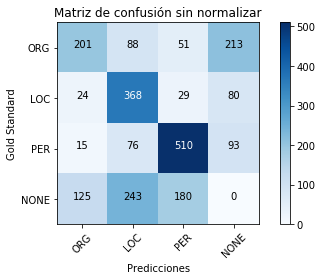

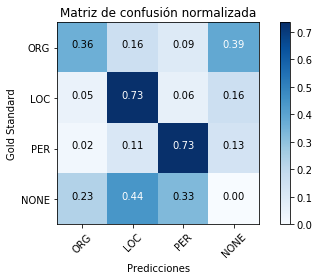

In [8]:
# Mostrar la matriz de confusión.
from sklearn.metrics import confusion_matrix

class_names = ['ORG', 'LOC', 'PER', 'NONE']
cnf_matrix = confusion_matrix(gs_vec, spacy_vec)
evaluation.show_conf_matrix(cnf_matrix, class_names, tfm_dir, model_name)

## Conclusiones
El modelo preentrenado de Spacy ha obtenido un 0.481 de F1-Score para el conjunto Gold Standard, lo cual parece bastante mejorable. Se ha alcanzado mayor recall (0.595) que precisión (0.404), que indica que se han reconocido la mayoría de entidades efectivamente nombradas, pero también que se han detectado bastantes entidades que en realidad no son nombradas (*false positives*). Cabe destacar que de estos *false positives*, el 57% se han reconocido como *organizaciones*.

La matriz de confusión normalizada nos ofrece más detalles sobre qué tipos de entidades se han confundido más. En particular, se obtiene un resultado aceptable (69%) para las entidades nombradas de tipo *persona* y *lugar*. Sin embargo, el modelo preentrenado de Spacy no ha reconocido la mayoría de *organizaciones* (61%) como tal, incluyendo un 37% de *organizaciones* que ni siquiera a reconocido como entidades nombradas.

Además, Spacy ha confundido los tipos de algunas entidades nombradas, principalmente al reconocer *organizaciones* y *personas* como un *lugares* (15% y 13%, respectivamente). 

## Estructura de directorios
* /brat: herramienta standalone de anotación.
* /bratreader: librería para crear los objetos Python a partir de las anotaciones.
* /gold-standard: conjunto de noticias de test (originales y anotaciones)
* /img: capturas de imágenes de ayuda.
* /src: código fuente propiamente implementado (notebook y fichero Python con funciones).

## Referencias

* Brat Rapid Annotation Tool: http://brat.nlplab.org/index.html
* BratReader: https://github.com/clips/bratreader.git
* Spacy: https://spacy.io

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%pyth